# Employee Turnover Analytics.

Target variable: left 

In [1]:
import pandas as pd
import numpy as np

### 1. Fetch Data and Preliminary EDA

In [2]:
df = pd.read_excel('1673873196_hr_comma_sep.xlsx')
df.shape

(14999, 10)

In [3]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   sales                  14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
satisfaction_level,14999.0,0.612834,0.248631,0.09,0.44,0.64,0.82,1.0
last_evaluation,14999.0,0.716102,0.171169,0.36,0.56,0.72,0.87,1.0
number_project,14999.0,3.803054,1.232592,2.00,3.00,4.00,5.00,7.0
average_montly_hours,14999.0,201.050337,49.943099,96.00,156.00,200.00,245.00,310.0
time_spend_company,14999.0,3.498233,1.460136,2.00,3.00,3.00,4.00,10.0
Work_accident,14999.0,0.144610,0.351719,0.00,0.00,0.00,0.00,1.0
left,14999.0,0.238083,0.425924,0.00,0.00,0.00,0.00,1.0
promotion_last_5years,14999.0,0.021268,0.144281,0.00,0.00,0.00,0.00,1.0


In [6]:
df.isna().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
sales                    0
salary                   0
dtype: int64

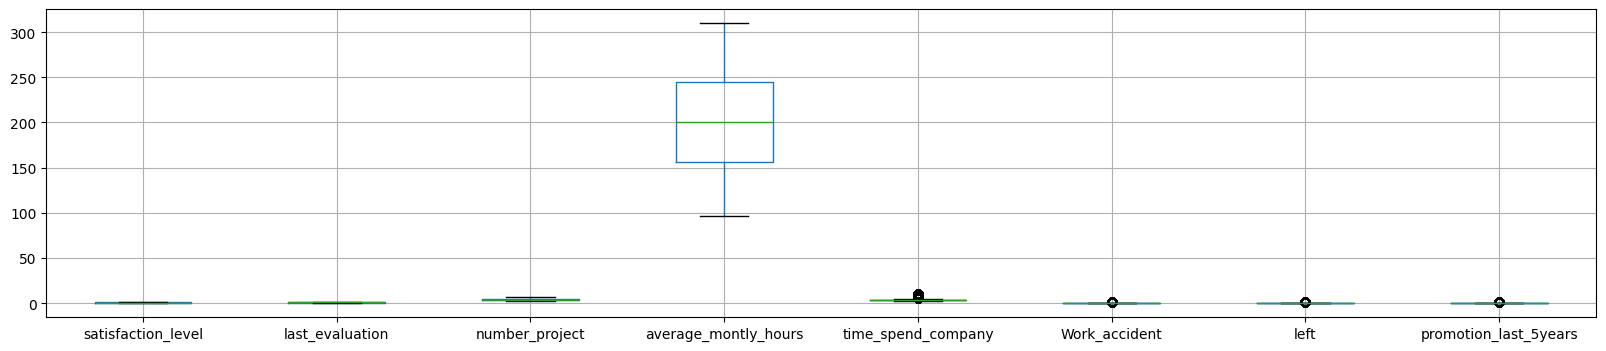

In [7]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,4))

x = df.boxplot()

In [8]:
df['sales'].value_counts()

sales
sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: count, dtype: int64

In [9]:
df['salary'].value_counts()

salary
low       7316
medium    6446
high      1237
Name: count, dtype: int64

In [10]:
df['left'].value_counts()

left
0    11428
1     3571
Name: count, dtype: int64

In [11]:
df.duplicated().sum()

3008

In [12]:
df['sales'].value_counts()

sales
sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: count, dtype: int64

In [13]:
df['salary'].value_counts()

salary
low       7316
medium    6446
high      1237
Name: count, dtype: int64

> Observations
* Data has no null values
* "time_spend_company" has outliers
* "sales", col. name is not appropriate
* for the target variable "left", we have more entries for 0(Still there) compared to 1(left)
* For "Salary" column , class 'high' has very less entries
* For "sales" column also classes are not evenly distributed
* there are 3012 duplicate entries

### 2. Preprocessing and Data Cleansing

In [14]:
## As per the observation we rename the column "sales" to "department"
df.rename(columns={"sales": "department"}, inplace=True)
df.columns.to_list()

['satisfaction_level',
 'last_evaluation',
 'number_project',
 'average_montly_hours',
 'time_spend_company',
 'Work_accident',
 'left',
 'promotion_last_5years',
 'department',
 'salary']

In [15]:
## Merge "IT" and "support" as "technical" 
df.department = df.department.replace('support', 'technical')
df.department.value_counts()

df.department = df.department.replace('IT', 'technical')
df.department.value_counts()

department
technical      6176
sales          4140
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: count, dtype: int64

In [16]:
# remove duplicates
a = df.shape[0]
df = df.drop_duplicates()
b = df.shape[0]
print(f"removed {str(a - b)} records")

removed 3012 records


### 3. Data Visualisation

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

<Axes: xlabel='satisfaction_level', ylabel='left'>

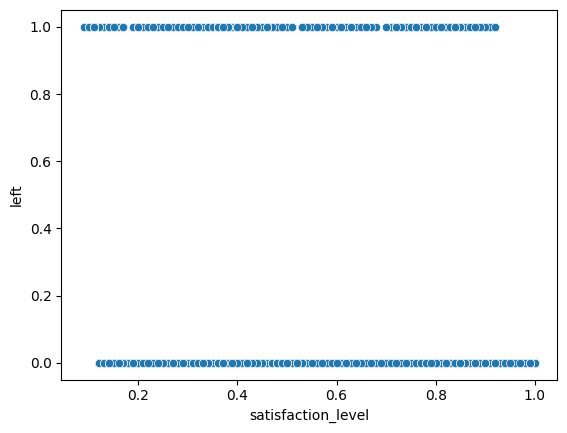

In [18]:
sns.scatterplot(data=df, x='satisfaction_level', y = 'left')

<Axes: xlabel='last_evaluation', ylabel='left'>

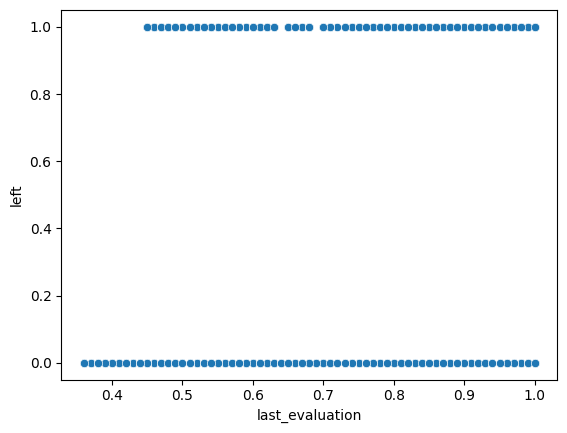

In [19]:
sns.scatterplot(data=df, x='last_evaluation', y = 'left')

<Axes: xlabel='last_evaluation', ylabel='satisfaction_level'>

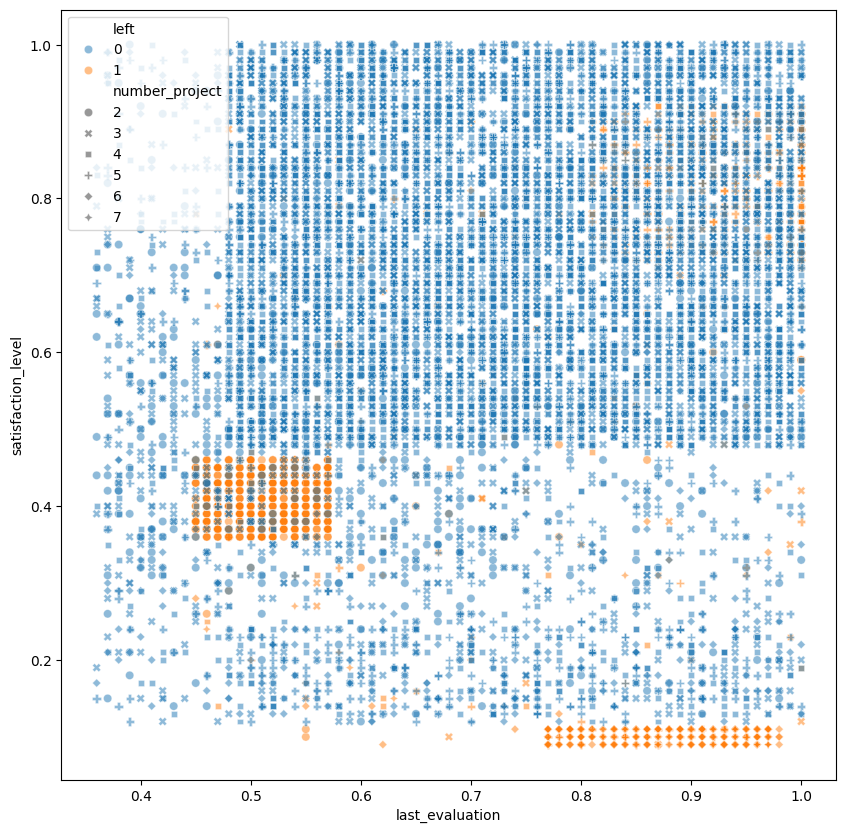

In [20]:

plt.figure(figsize=(10,10))
sns.scatterplot(data=df, x='last_evaluation', y = 'satisfaction_level', hue='left', alpha = 0.5, style = "number_project")

<Axes: xlabel='department', ylabel='left'>

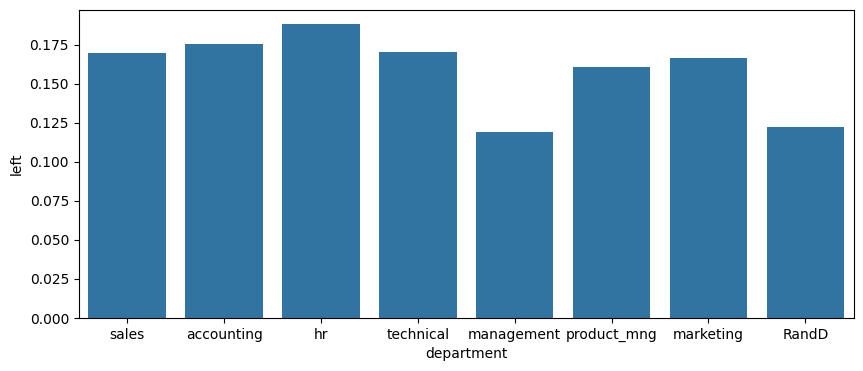

In [24]:
plt.figure(figsize=(10,4))
sns.barplot(df, x='department', y='left', errorbar=('ci', 0))

<Axes: xlabel='satisfaction_level', ylabel='average_montly_hours'>

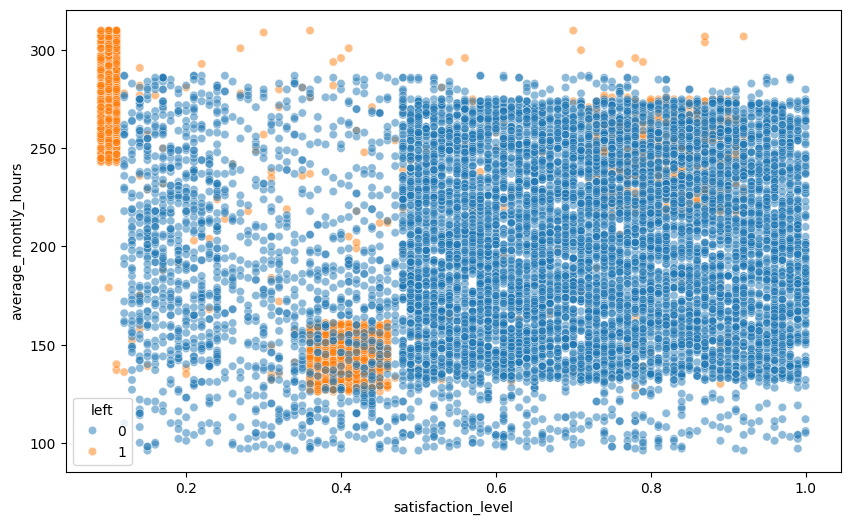

In [26]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='satisfaction_level', y = 'average_montly_hours', hue='left', alpha = 0.5)

> Observations
1. Low Satisfaction & Low Last evaluation score: left
2. High Satisfaction & Hight Last Evaluation score: Stayed
3. High "number_project"(> 5), despite high evaluation score: left
4. from department 'hr' maximum % left, least from 'management'

### 4. Encoding Categorical

In [27]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [34]:
df['department'] = le.fit_transform(df['department'])
df['salary'] = le.fit_transform(df['salary'])

### 5. Outlier detection and removal

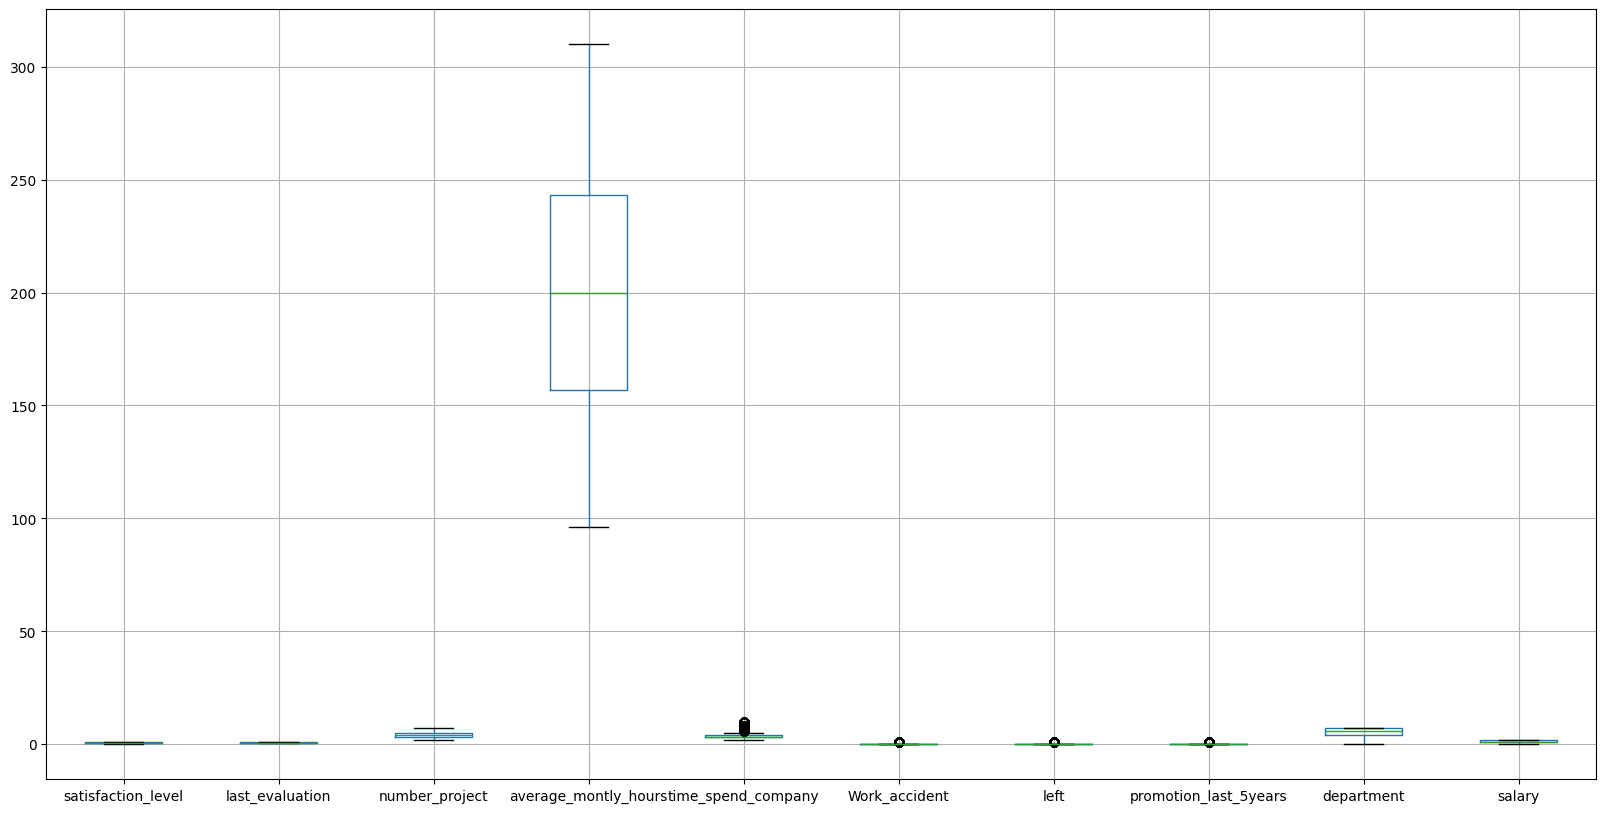

In [37]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,10))

x = df.boxplot()

In [38]:
def outliers(df):
    q1 = df.quantile(0.25)
    q3 = df.quantile(0.75)
    IQR = q3 - q1
    outliers = df[ ( (df < (q1-1.5*IQR)) | (df > (q3+1.5*IQR)) ) ]
    lwr = q1 - 1.5 * IQR
    upr = q3 + 1.5 * IQR
    return outliers, lwr, upr

out_tsc, lwrRange, uprRange = outliers(df['time_spend_company'])
print('Total Outliers: ' + str(len(out_tsc)))
print('LowerRange in hdlngth: ' + str(round(lwrRange,1)))
print('UpperRange in hdlngth: ' + str(round(uprRange,1)))


Total Outliers: 824
LowerRange in hdlngth: 1.5
UpperRange in hdlngth: 5.5


In [39]:
df[ (df['time_spend_company'] < lwrRange) | (df['time_spend_company'] > uprRange) ]

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
1,0.80,0.86,5,262,6,0,1,0,6,2
17,0.78,0.99,4,255,6,0,1,0,6,1
34,0.84,0.87,4,246,6,0,1,0,2,1
47,0.57,0.70,3,273,6,0,1,0,7,1
67,0.90,0.98,4,264,6,0,1,0,5,2
...,...,...,...,...,...,...,...,...,...,...
11994,0.22,0.94,3,193,10,0,0,1,3,0
11995,0.90,0.55,3,259,10,1,0,1,3,0
11996,0.74,0.95,5,266,10,0,0,1,3,0
11997,0.85,0.54,3,185,10,0,0,1,3,0


### 6. Check for imbalance in data set

In [40]:
X = df.drop('left', axis =1)
y = df['left']

In [ ]:
# from imblearn.o